In [1]:
# ----------------------------------------------------------------------------------------
# The demomstration of SWiM-Net.

# Title: Snapshot Wide-field Multispectral Imaging behind Scattering Medium using Convolutional Neural Networks

# Author: Hua Zhang, Liangcai Cao, Xiaohan Li, Chengyu Wang, Jiache Wu, Michael Gehm, Dacid J. Brady, Guofan jin

# Institution: Hololab,Department of Precision Instruments, Beijing, China, 100084

# Date: 02.28.2019

# ---------------------------------------------------------------------------------------

In [2]:
import tensorflow as tf
import os

gpu_no = '0' 
os.environ["CUDA_VISIBLE_DEVICES"] = gpu_no

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.95
sess = tf.InteractiveSession(config = config)

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import scipy.io as io  
from keras import optimizers
from keras import backend as K

Using TensorFlow backend.


In [4]:
 ## 2018-12-31
from model_swimnet import defined_model_swimnet_hololab
model = defined_model_swimnet_hololab()

inputs: (?, 128, 128, 1)
Contracting Layer1: (?, 128, 128, 32)
Contracting Layer2: (?, 64, 64, 40)
Contracting Layer3: (?, 32, 32, 56)
Contracting Layer4: (?, 16, 16, 88)
Contracting Layer5: (?, 8, 8, 152)
Contracting Layer6: (?, 4, 4, 280)
Contracting Layer7: (?, 2, 2, 536)
Expending Layer 8: (?, 1, 1, 1048)
Expending Layer 9: (?, 2, 2, 536)
Expending Layer 10: (?, 4, 4, 280)
Expending Layer 11: (?, 8, 8, 152)
Expending Layer 12: (?, 16, 16, 88)
Expending Layer 13: (?, 32, 32, 56)
Expending Layer 14: (?, 64, 64, 40)
Expending Layer 15: (?, 128, 128, 32)
Final output: (?, 128, 128, 3)


In [5]:
# data
test_speckle = np.load('test_speckle.npy')
test_truth = np.load('test_truth.npy')

In [6]:
# upload the wight of network
try:
    model.load_weights("Wight_SWiMNet_color_TV.h5")
    print("wight is loaded succefullly")
except :    
    print("wight is loaded unsuccefully! Build a new model!")


wight is loaded succefullly


In [7]:
# prediction
test_reconstruction = model.predict(test_speckle, batch_size=20)

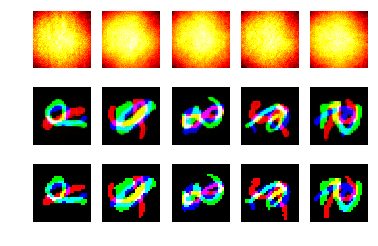

In [8]:
# red channel
# plot speckle,test_reconstruction,test_truth
num = 5;
plt.figure()
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow( test_speckle[ num+i, :, :, 0].squeeze(), cmap='hot')
    plt.axis('off')
    plt.subplot(3, 5, i + 1 + 5)
    plt.imshow( test_reconstruction[ num+i, :, :, :].squeeze(), cmap='gray')
    plt.axis('off')
    plt.subplot(3, 5, i + 1 + 10)
    plt.imshow( test_truth[ num+i, :, :, :].squeeze(), cmap='gray')
    plt.axis('off')

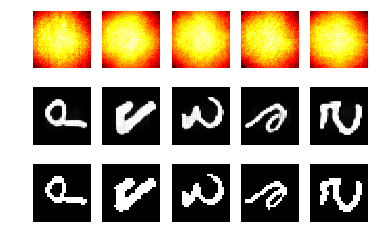

In [9]:
# green channel
# plot speckle,test_reconstruction,test_truth
num = 5;
numc = 1; # 0 : red channel;  1:green channel;  2 : blue channel; 
plt.figure()
for i in range(5):
    plt.subplot(3, 5, i + 1)
    plt.imshow( test_speckle[ num+i, :, :, 0].squeeze(), cmap='hot')
    plt.axis('off')
    plt.subplot(3, 5, i + 1 + 5)
    plt.imshow( test_reconstruction[ num+i, :, :, numc].squeeze(), cmap='gray')
    plt.axis('off')
    plt.subplot(3, 5, i + 1 + 10)
    plt.imshow( test_truth[ num+i, :, :, numc].squeeze(), cmap='gray')
    plt.axis('off')